In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_colwidth', None)

# Loading Time Series Tables: Employment per Neighborhood

In [48]:
des = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\desigualdade.xls', None)

In [49]:
des.keys()

dict_keys(['Definições', 'RA 1991', 'RA_2000', 'Bairros 1991', 'Bairros_2000'])

In [50]:
keys = list(des.keys())

# Cleaning

In [ ]:
2005: 0,1,3,5 / -10
...
2014: 0,1,3,5 / -8
...

In [135]:
des_dfs = [des[keys[j]].copy() for j in range(3,5)]

In [136]:
for i, ano in zip(range(2), [1991, 2000]): 
    
    df = des_dfs[i].copy()
    cols = df.loc[5].values.tolist()
    df.columns = cols
    df = df.head(-7).tail(-6).dropna(how='all').reset_index(drop=True)
    ano =  pd.DataFrame({"Ano":[ano for j in range(len(df))]})
    df = pd.concat([ano, df], axis=1)
    des_dfs[i] = df.copy()

In [142]:
[len(des_dfs[i]) for i in range(2)]

[125, 125]

In [143]:
des_df = pd.concat([des_dfs[0], des_dfs[1]], axis=0)

# Type Conversion

In [147]:
des_df.iloc[:, 2:] = des_df.iloc[:, 2:].astype(float)

# Testing

In [151]:
sum(des_dfs[0]['Bairros']!=des_dfs[1]['Bairros'])

0

# Saving/loading Combined Rio de Janeiro Inequality Time Series Table:

In [148]:
#des_df.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\des_clean.csv')

In [154]:
des = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\des_clean.csv', index_col=0)

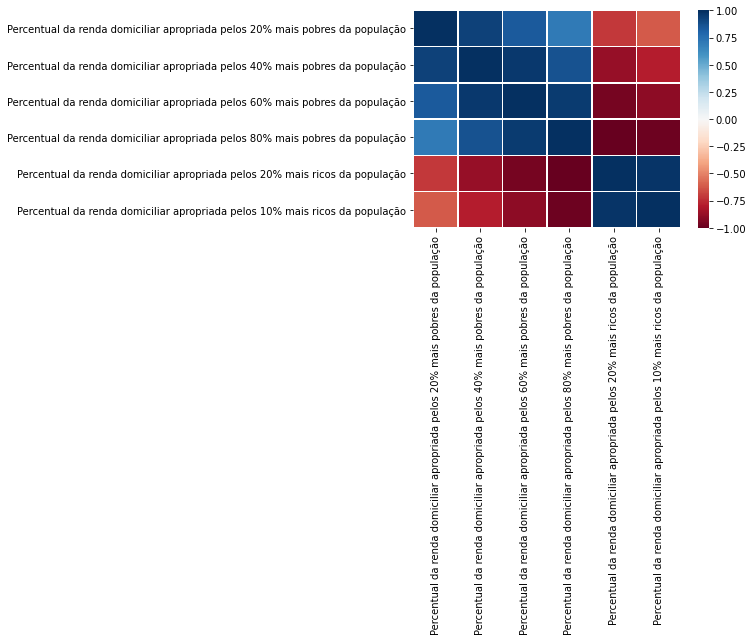

In [157]:
sns.heatmap(des.iloc[:, 2:].corr(), cmap='RdBu', linewidths=0.5)